In [1]:
import nest
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import time
        
import nest.voltage_trace
import nest.raster_plot
    
nest.set_verbosity("M_WARNING")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Network Architecture

In [2]:
def CorticalThalamicNetwork():
    nest.ResetKernel()
    nest.update_time_limit = 120.0
    startbuild = time.time()
#
#   Parameter assumed by the network
    simtime = 1000.0
    pRate = 0.5
#   
#   Number of neuron populations
    ExciCrNeuron = 181 
    InhiCrNeuron = 201
    ExciThlNeuron = 325
    InhiThlNeuron = 201
    TotalNeurons = ExciCrNeuron + InhiCrNeuron + ExciThlNeuron + InhiThlNeuron
#
#   Neuron parameters -- first run
    #vPeak = -40.4
    vPeak = nest.GetDefaults('aeif_cond_alpha')['V_th']+5*nest.GetDefaults('aeif_cond_alpha')['Delta_T']
    b = 0.01
    neuronParams = {"V_peak": vPeak, 'b': b}
#
    print("Building Cortical Thalamic Network")
#
#   Set defaults - AdEx com neuroParams and Poissonian spike generator with rate p_rate
    nest.SetDefaults("aeif_cond_alpha", neuronParams)
    nest.SetDefaults("poisson_generator", {"rate": pRate})                 
#
#   Creating populations
    NeuronsCxEx = nest.Create("aeif_cond_alpha", ExciCrNeuron)
    NeuronsCxIn = nest.Create("aeif_cond_alpha", InhiCrNeuron)
    NeuronsThEx = nest.Create("aeif_cond_alpha", ExciThlNeuron)
    NeuronsThIn = nest.Create("aeif_cond_alpha", InhiThlNeuron)
    NeuronsAll = NeuronsCxEx + NeuronsCxIn + NeuronsThEx + NeuronsThIn
#    
    noise = nest.Create("poisson_generator")
#
#   Creating voltmeters and recorders
    VmCxEx = nest.Create('voltmeter')
    VmCxIn = nest.Create("voltmeter")
    VmThEx = nest.Create("voltmeter")
    VmThIn = nest.Create("voltmeter")
    
    CrExspike = nest.Create("spike_recorder")
    CrInspike = nest.Create("spike_recorder")
    ThExspike = nest.Create("spike_recorder")
    ThInspike = nest.Create("spike_recorder")
    AllSpike = nest.Create("spike_recorder")
#
#   Configuration of the voltmeters
    nest.Connect(VmCxEx, NeuronsCxEx)
    nest.Connect(VmCxIn, NeuronsCxIn)
    nest.Connect(VmThEx, NeuronsThEx)
    nest.Connect(VmThIn, NeuronsThIn)
    
    nest.Connect(NeuronsCxEx, CrExspike)
    nest.Connect(NeuronsCxIn, CrInspike)
    nest.Connect(NeuronsThEx[1:181], ThExspike)
    nest.Connect(NeuronsThIn, ThInspike)    
#
#   Connecting populations
    print("Connecting populations")
#
#    print("NeuronsCxEx -> NeuronsCxIn")
    nest.Connect(NeuronsCxEx, NeuronsCxIn, syn_spec={"weight" : 60})
#
#    print("NeuronsThEx -> NeuronsThIn")
    nest.Connect(NeuronsThEx, NeuronsThIn, syn_spec={"weight" : 10})
#
#    print("NeuronsCxIn -> NeuronsCxIn")
    nest.Connect(NeuronsCxIn, NeuronsCxIn, syn_spec={"weight" : -1})
#
#    print("NeuronsCxIn -> NeuronsCxEx")
    nest.Connect(NeuronsCxIn, NeuronsCxEx, syn_spec={"weight" : -4})
#
#    print("NeuronsThIn -> NeuronsThIn")
    nest.Connect(NeuronsThIn, NeuronsThIn, syn_spec={"weight" : -1})

#    print("NeuronsThIn -> NeuronsThEx")
    nest.Connect(NeuronsThIn, NeuronsThEx, syn_spec={"weight" : -10})
#
    print("Implement the STDP")      
#
#   Create the connection type between populations via STDP mechanism.
    CxExtoCxEx = {"synapse_model" : "stdp_synapse", "weight" : 1, "Wmax" : 150}
    CxExtoThEx = {"synapse_model" : "stdp_synapse", "weight" : 1, "Wmax" : 130}
    ThExtoCxEx = {"synapse_model" : "stdp_synapse", "weight" : 1.0, "Wmax" : 5.5}
#
#    print("NeuronsCxEx -> NeuronsThEx")
    nest.Connect(NeuronsCxEx, NeuronsThEx, syn_spec=CxExtoThEx)
#
#    print("NeuronsThEx -> NeuronsCxEx")
    nest.Connect(NeuronsThEx, NeuronsCxEx, syn_spec=ThExtoCxEx)
#
#    print("NeuronsCxEx -> NeuronsCxEx")
    nest.Connect(NeuronsCxEx, NeuronsCxEx, syn_spec=CxExtoCxEx)
#
#   Activantig the Possoinian spike train over 20 cortical excitatory neurons
#    print("Activantig the Possoinian spike train over 20 cortical excitatory neurons")
    print("Activantig the Possoinian spike train over the population")
    
    #CxExNoise = nest.Create('poisson_generator', {'rate': 2000.0})
    #CxInNoise = nest.Create('poisson_generator', {'rate': 10000.0})
    #nest.Connect(CxExNoise, NeuronsCxEx[20:40], syn_spec={'weight':15})
    #nest.Connect(CxInNoise, NeuronsCxIn, syn_spec={'weight':5})
    
    ThExNoise = nest.Create('poisson_generator', {'rate': 30000.0})
    ThInNoise = nest.Create('poisson_generator', {'rate': 10000.0})
    nest.Connect(ThExNoise, NeuronsThEx[1:181], syn_spec={'weight':8})
    nest.Connect(ThInNoise, NeuronsThIn, syn_spec={'weight':5})
#
    nest.Simulate(simtime)
    print("Simulating...")
    #nest.voltage_trace.from_device(VmCxEx)
    #nest.voltage_trace.from_device(VmCxIn)
    #nest.voltage_trace.from_device(VmThEx)
    #nest.voltage_trace.from_device(VmThIn)

#
    N_rec = 1000.0
    rateEx= CrExspike.n_events / simtime * 5000 / N_rec
    print(f"Excitatory rate: {rateEx:.2f} [1/s]")
    rateIn= CrInspike.n_events / simtime * 5000 / N_rec
    print(f"Inhibitory rate: {rateIn:.2f} [1/s]")
    
    rateExTh= ThExspike.n_events / simtime * 1000 / N_rec
    print(f"Thalamical Excitatory rate: {rateExTh:.2f} [1/s]")
    rateInTh= ThInspike.n_events / simtime * 1000 / N_rec
    print(f"Thalamical Inhibitory rate: {rateInTh:.2f} [1/s]")
#
    nest.raster_plot.from_device(CrExspike, title='Cx raster plot', hist=True)
    nest.raster_plot.from_device(CrInspike, title='In raster plot', hist=True)
    nest.raster_plot.from_device(ThExspike, title='Th raster plot', hist=True)
    nest.raster_plot.from_device(ThInspike, title='Re raster plot', hist=True)
#
    #fig, ax = plt.subplots(2,2)
    #ax[0,0].plot(nest.voltage_trace.from_device(VmCxEx))
    #ax[0,1].plot(nest.voltage_trace.from_device(VmCxIn))
    #ax[1,0].plot(nest.voltage_trace.from_device(VmThEx))
    #ax[1,1].plot(nest.voltage_trace.from_device(VmThIn))
    
    print("Done!")
#

Building Cortical Thalamic Network
Connecting populations
Implement the STDP
Activantig the Possoinian spike train over the population
Simulating...
Excitatory rate: 776.49 [1/s]
Inhibitory rate: 40736.67 [1/s]
Thalamical Excitatory rate: 18.25 [1/s]
Thalamical Inhibitory rate: 822.69 [1/s]
Done!


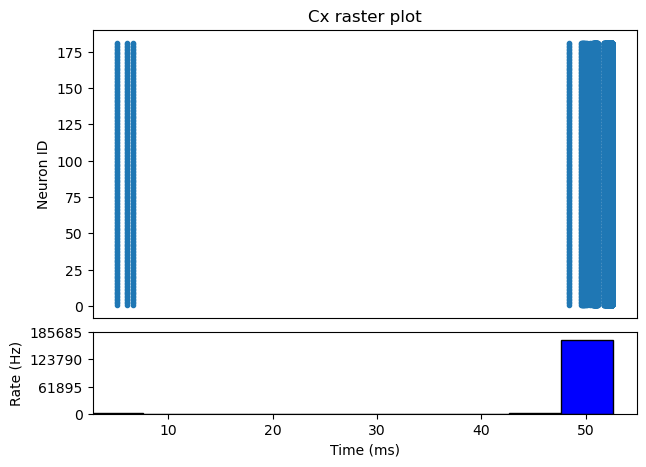

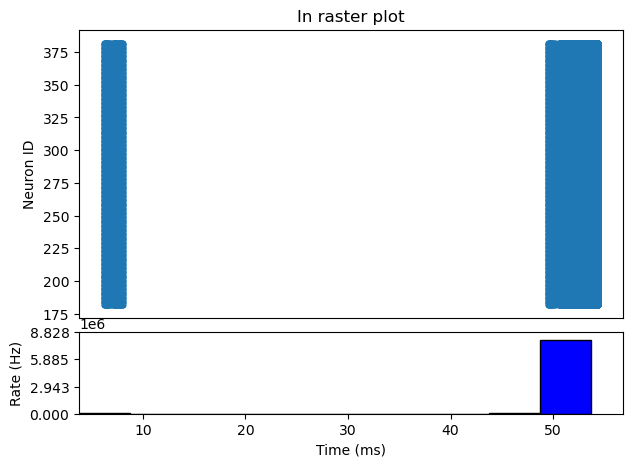

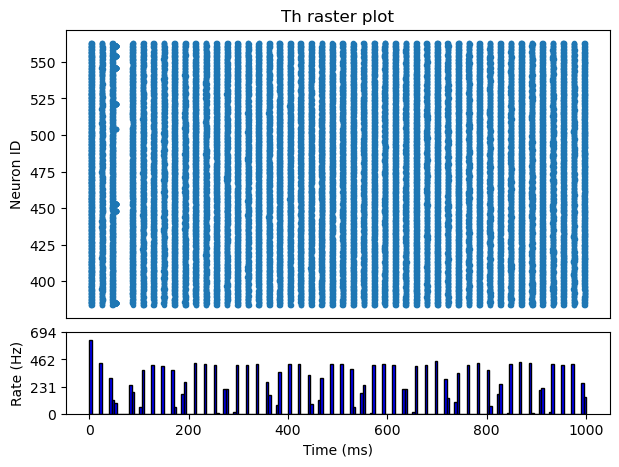

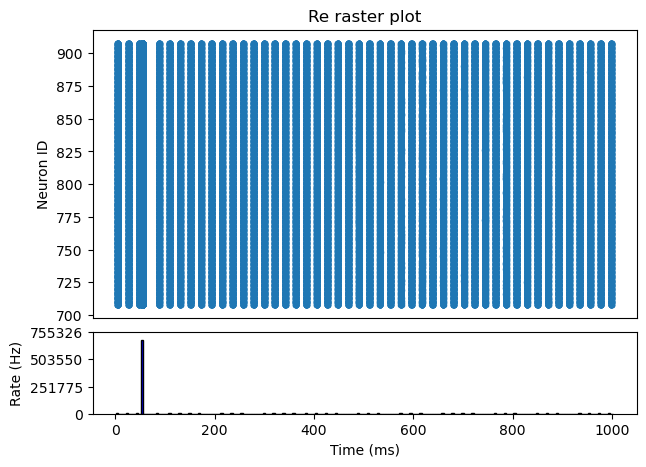

In [3]:
CorticalThalamicNetwork()

In [7]:
#nest.GetDefaults

In [4]:
#nest.GetDefaults("aeif_cond_alpha")

In [5]:
nest.voltage_trace.from_device?

Signature:
nest.voltage_trace.from_device(
    detec,
    neurons=None,
    title=None,
    grayscale=False,
    timeunit='ms',
)
Docstring:
Plot the membrane potential of a set of neurons recorded by
the given voltmeter or multimeter.

Parameters
----------
detec : list
    Global id of voltmeter or multimeter in a list, e.g. [1]
neurons : list, optional
    Indices of of neurons to plot
title : str, optional
    Plot title
grayscale : bool, optional
    Plot in grayscale
timeunit : str, optional
    Unit of time

Raises
------
nest.kernel.NESTError
    Description
File:      /srv/main-spack-instance-2309/spack/var/spack/environments/ebrains-23-09/.spack-env/view/lib/python3.8/site-packages/nest/voltage_trace.py
Type:      function